# Linear Regression

# Introduction

The main objective of the Linear Regression assignment is to apply the Linear Regression on the house sales dataset and predict the price of the house. The dataset contains several features like bedrooms, bathrooms, living room size, and house grade which will allow predicting the target price for the house. In this assignment, two different Linear Regression algorithms, Least-Squares, and Least Mean Squares are implemented to understand the performance of both the algorithms.

In the first part of the assignment, preprocessing and data visualization are performed to better understand the relationships among different columns and find observations that can be used for the next part of the assignment.

In the second part of the assignment, the preprocessed dataset is used to apply the Least Squares algorithm and Least Mean Square algorithm to predict the house prices in King County, Washington state. To apply the Linear Regression algorithm, the dataset is divided into training and test datasets where the data is first trained on the training dataset. Then the trained model is applied to the test data for the prediction. After applying the algorithms, the results from both the algorithms will be compared to understand which model performed better. The observations and visualizations will be provided for the data predicted from the machine learning models.

# Data
### House Sales in King County, Washington State
<br>
This dataset contains the record of houses sold between May 2014 to May 2015 in King County, Washington.<br>The dataset contains detailed information for each house like:

- ID
- Date sold
- Price
- Number of bedrooms
- Number of bathrooms
- Living room size (sqft)
- Lot Size (sqft)
- Number of floors
- Is it a waterfront property? (0 or 1)
- View rating (0-4)
- Condition rating (1-5)
- Grade rating (1-13)
- Above size (sqft)
- Basement size (sqft)
- Year built
- Year renovated
- Zipcode
- Latitude
- Longitude

The dataset contains a total of 13 columns and 21613 records. With the help of all the details provided from the dataset, I will try to gain insights from the data through a cycle of preprocessing, visualization, and finally applying regression analysis to predict the house selling price based on the provided house features.

### Data Preprocessing:
In this process, I will clean, transform, and organize the dataset to ensure that the rows do not contain any missing values or duplicates which could cause inconsistency in the later process. The main focus of this step will be to ensure that the data is fit for visualizing and understanding patterns for the prediction model.

### Data Visualization:
In this process, I will utilize several data visualization techniques to understand the relationship among different features in the dataset. This will allow me to find out which variables have a high correlation in predicting the house price

### Data Observation:
After applying the data visualization, I will record the observations made from the data to help develop an accurate machine learning model.


### Prediction Model Using Regression:
This step will be further completed in the next assignment.

<b>Source:</b>
The dataset is derived from the Kaggle website titled "House Sales in King County, USA" uploaded by the user harlfoxem. The dataset does not contain extra metadata or article.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

In [2]:
df = pd.read_csv('house_sales/data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Columns in dataset

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Number of rows and columns in the dataset

In [4]:
rows, columns = df.shape
print(f"ROWS:     {rows}")
print(f"COLUMNS:  {columns}")

ROWS:     21613
COLUMNS:  21


There are 21,613 rows and 21 columns.

## Preprocessing Data

### Check for missing values

In [5]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
np.any(df.isnull())

False

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

From the above validation, it can be seen that the dataset does not contain any missing values.

### Checking for duplicates

In [9]:
df.duplicated().sum()

0

In [10]:
df.duplicated().any()

False

The dataset does not contain any missing values.

In [11]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Columns Check

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Since the dataset does not contain metadata, Let's observe some column values which are categorized:

#### The view column is categorized from 0 to 4:

In [13]:
set(df.view)

{0, 1, 2, 3, 4}

#### The condition column is categorized from 1 to 5:

In [14]:
set(df.condition)

{1, 2, 3, 4, 5}

#### The grade column is categorized from 1 to 13:

In [15]:
set(df.grade)

{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

#### Column Datatypes:

In [16]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Timestamp column to Date conversion

In [17]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

##### Currently the date column is in timestamp format: 20141013T000000 <br>So converting it to more readable time format: 2014-10-13

In [18]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.date())

In [19]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Spliting Month and Year

In [20]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [21]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


### Removing Non-descriptive columns
* Since id, lat, and long columns don't give much information, I'm removing it from the data frame.
* The column sqft_living15, sqft_lot15 are duplicated in the dataset so removing it.
* The date is now split into month and year so removing the date column.

In [22]:
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df.drop('sqft_living15', axis=1, inplace=True)
df.drop('sqft_lot15', axis=1, inplace=True)

In [23]:
df.head(4)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,2014,12


In [24]:
df.shape

(21613, 17)

#### Again, checking the column datatypes

In [25]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
year               int64
month              int64
dtype: object

### Sampling the dataset to work with 10,000 rows

In [26]:
df = df.sample(10000)

In [27]:
newdf = df.copy()

In [28]:
df.shape

(10000, 17)

## Dataset Summary

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.410897e+05,3.363900,2.110175,2078.326500,1.496009e+04,1.488150,0.007800,0.241400,3.413900,7.65090,1780.56590,297.760600,1970.685800,89.828500,98078.073900,2014.320800,6.611900
std,3.610323e+05,0.918238,0.770521,915.933018,3.997611e+04,0.539179,0.087977,0.776908,0.652862,1.17037,817.46737,450.190031,29.293731,413.852343,53.570025,0.466807,3.112241
min,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.00000,0.000000,1900.000000,0.000000,98001.000000,2014.000000,1.000000
25%,3.240000e+05,3.000000,1.500000,1420.000000,5.025750e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.00000,0.000000,1951.000000,0.000000,98033.000000,2014.000000,4.000000
50%,4.540000e+05,3.000000,2.250000,1910.000000,7.641500e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1570.00000,0.000000,1974.000000,0.000000,98065.000000,2014.000000,7.000000
75%,6.499500e+05,4.000000,2.500000,2560.000000,1.075325e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2200.00000,580.000000,1996.000000,0.000000,98118.000000,2015.000000,9.000000
max,6.885000e+06,11.000000,7.750000,9890.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.00000,4820.000000,2015.000000,2015.000000,98199.000000,2015.000000,12.000000


In [30]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'year',
       'month'],
      dtype='object')

In [31]:
set(df.year)

{2014, 2015}

##### The dataset contains sample from 2014, 2015. So splitting the data accordingly to see the differences:

In [32]:
df_year_2014 = df[df.year == 2014]

In [33]:
df_year_2014.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
16100,1200000.0,3,3.50,4310,10842,2.0,0,2,3,10,3140,1170,1988,0,98177,2014,8
8464,306000.0,3,1.00,1450,7200,1.0,0,0,3,7,1010,440,1969,0,98034,2014,7
7647,542500.0,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,2014,5
18417,252000.0,4,1.75,1120,8250,1.0,0,0,4,7,1120,0,1966,0,98058,2014,7
14804,330000.0,3,2.25,1860,11227,2.0,0,0,3,7,1860,0,1995,0,98038,2014,6


In [34]:
df_year_2014.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
count,6.792000e+03,6792.000000,6792.000000,6792.000000,6.792000e+03,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.000000,6792.00000,6792.000000,6792.0,6792.000000
mean,5.391485e+05,3.366313,2.120105,2089.745730,1.492371e+04,1.496908,0.007803,0.236749,3.435807,7.666961,1789.090548,300.655183,1970.498233,94.33245,98078.827002,2014.0,8.294170
std,3.618918e+05,0.924049,0.767733,922.487941,4.021150e+04,0.541794,0.087997,0.775424,0.667306,1.173799,823.909040,453.893491,29.525038,423.58520,53.419465,0.0,2.183601
min,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.00000,98001.000000,2014.0,5.000000
25%,3.249875e+05,3.000000,1.750000,1440.000000,5.001750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.00000,98033.000000,2014.0,6.000000
50%,4.537500e+05,3.000000,2.250000,1920.000000,7.650000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1974.000000,0.00000,98072.000000,2014.0,8.000000
75%,6.450000e+05,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2208.500000,590.000000,1996.000000,0.00000,98118.000000,2014.0,10.000000
max,6.885000e+06,11.000000,7.750000,9890.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.00000,98199.000000,2014.0,12.000000


#### The data summary shows that the mean price of a house sold in 2014 was $538,810.40 with an average of 3 bedrooms, 2 bathrooms, 2,100 sqft living room, 15,204 sqft lot, 1 floor, 1,802 sqft above space, and 298 sqft basement.

In [35]:
df_year_2015 = df[df.year == 2015]

In [36]:
df_year_2015.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
15489,680000.0,4,2.75,3620,35429,2.0,0,0,3,10,3620,0,2006,0,98058,2015,4
18026,575000.0,3,2.00,1520,5000,1.5,0,0,3,7,1140,380,1945,0,98107,2015,2
18204,818000.0,3,3.25,2200,4800,2.0,0,2,3,7,1910,290,1943,1996,98103,2015,4
6012,925000.0,4,2.50,3350,4501,2.0,0,0,3,9,2640,710,2002,0,98117,2015,4
19348,365000.0,3,2.25,1800,9010,1.0,0,0,3,7,1300,500,1975,0,98155,2015,4


In [37]:
df_year_2015.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
count,3.208000e+03,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.000000,3208.0,3208.000000
mean,5.451994e+05,3.358791,2.089152,2054.149626,15037.123130,1.469607,0.007793,0.251247,3.367519,7.616895,1762.517456,291.632170,1971.082918,80.292706,98076.479426,2015.0,3.050187
std,3.592273e+05,0.905933,0.776090,901.563074,39479.232612,0.533209,0.087947,0.780071,0.618722,1.162527,803.487507,442.254304,28.798408,392.343946,53.861012,0.0,1.191504
min,8.500000e+04,0.000000,0.000000,390.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,2015.0,1.000000
25%,3.207500e+05,3.000000,1.500000,1400.000000,5057.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98031.000000,2015.0,2.000000
50%,4.549750e+05,3.000000,2.250000,1890.000000,7616.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,98059.000000,2015.0,3.000000
75%,6.500000e+05,4.000000,2.500000,2540.000000,10630.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,540.000000,1995.000000,0.000000,98117.000000,2015.0,4.000000
max,4.208000e+06,9.000000,6.500000,7440.000000,871200.000000,3.500000,1.000000,4.000000,5.000000,12.000000,7420.000000,2220.000000,2015.000000,2015.000000,98199.000000,2015.0,5.000000


#### The data summary shows that the mean price of a house sold in 2015 was $542,538.10 with an average of 3 bedrooms, 2 bathrooms, 2,041 sqft living room, 15,176 sqft lot, 1 floor, 1,760 sqft above space, and 281 sqft basement.

### The data suggests that the house prices rose in 2015 when compared to the year 2014.

## Removing outliers for better prediction model

In [38]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

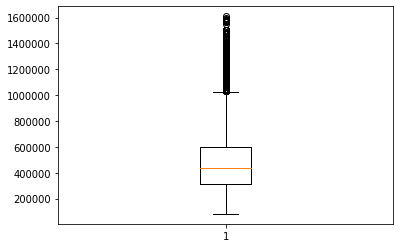

In [39]:
plt.boxplot(df["price"])
plt.show()

### Normalizing data

In [40]:
df=(df-df.mean())/df.std()

## Splitting data into Features and Target

#### Creating a new dataframe T to store the target column: House Price

In [41]:
Target = df.iloc[:,0]
Target

15489    0.855231
16100    3.113651
18026    0.399203
6012     1.919294
19348   -0.512851
           ...   
18650   -0.295695
16576    2.106048
20608    1.376361
13556   -0.491135
16703   -1.186034
Name: price, Length: 8791, dtype: float64

In [42]:
Target.shape

(8791,)

#### Creating a new dataframe Features to store the feature columns

In [43]:
feature_cols = [x for x in df.columns if x != 'price']
Features = df[feature_cols]
Features.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
15489,0.813759,1.037511,2.234194,1.993156,0.974093,NaN,-0.232275,-0.653432,2.364758,2.698956,-0.657778,1.189782,NaN,-0.375254,1.451626,-0.839360
16100,-0.368876,2.125517,3.158883,0.043711,0.974093,NaN,4.693976,-0.653432,2.364758,2.025110,2.355601,0.564067,NaN,1.866600,-0.688804,0.449403


In [44]:
Features.shape

(8791, 16)

## Data Visualization

#### Creating a scatter plot to visualize the relationship between the house price and other variables.

<Figure size 432x288 with 0 Axes>

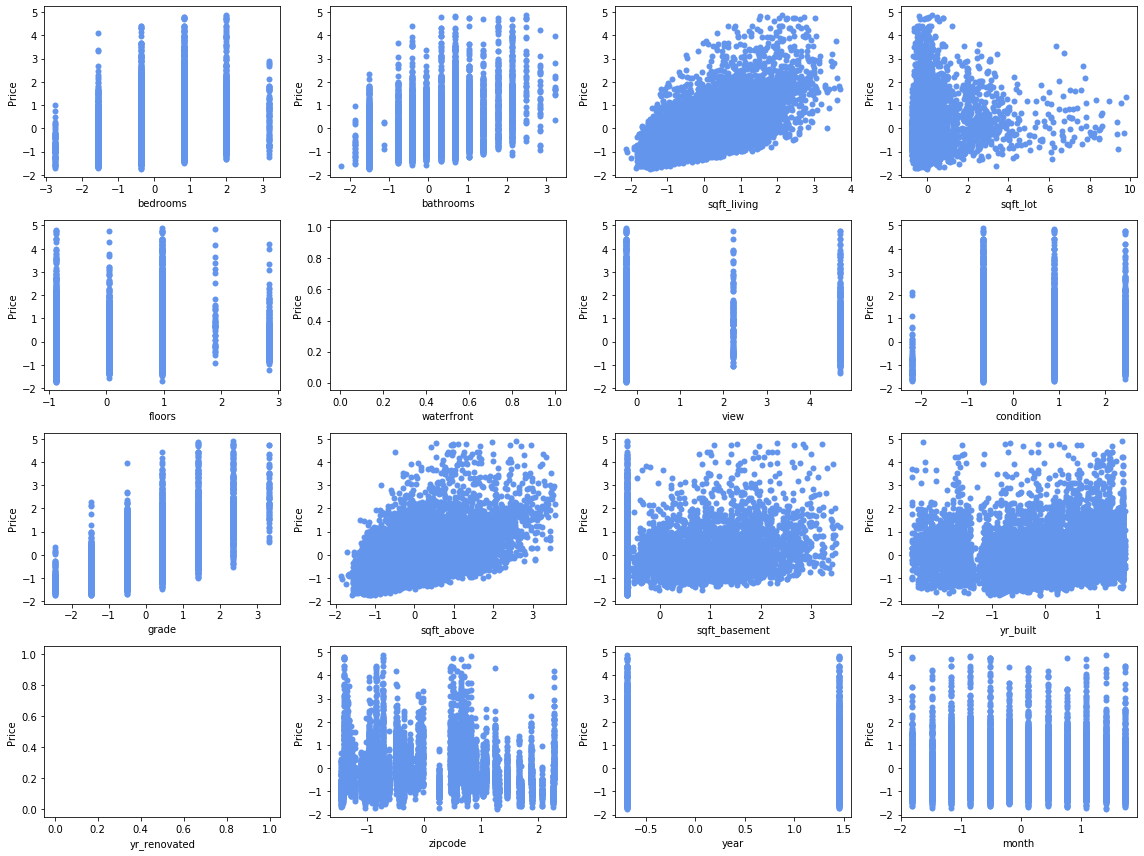

In [45]:
plt.clf() # Clear previous plt figure
fig = plt.figure(figsize=(16,12))
for i in range(16):
    plt.subplot(4, 4, i+1) # Selects which subplot to plot to
    plt.scatter(Features.iloc[:, i], Target, linewidth=0, color='cornflowerblue') # Plots a given column
    plt.xlabel(Features.columns.values[i]) # Sets X label
    plt.ylabel("Price") # Sets Y label
fig.tight_layout()

#### Observations
- Looking at the relationship between house price and bedrooms, it can be seen that the houses with 5 to 7 bedrooms have a higher cost. 
- Most houses have an average of 2 to 4 bathrooms. As the number of bathrooms increases, the cost of the house increases.
- There seems to be a linear relationship between the living room size and house price. The cost of the houses with a larger living room area is higher.
- Houses with 2 floors are highly expensive.
- The house with condition rating 3 is sold at the highest price.
- There is a linear relationship with house grade and house cost. The houses with a grade higher than 12 are very expensive.
- The houses with more space above and in the basement are sold at a higher cost.
- The houses built after the year 2000 are sold at a higher cost where compared to the older houses.

## Box and Whisker plots

<Figure size 432x288 with 0 Axes>

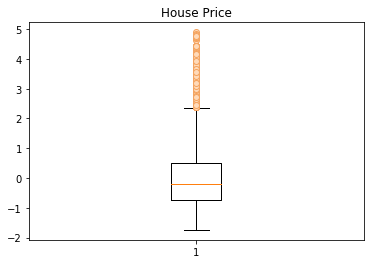

In [46]:
plt.clf()
props=dict(marker='o', markerfacecolor='peachpuff', mec='sandybrown')
fig4, ax4 = plt.subplots()
ax4.set_title('House Price')
ax4.boxplot(Target, flierprops=props)
plt.show()

<Figure size 432x288 with 0 Axes>

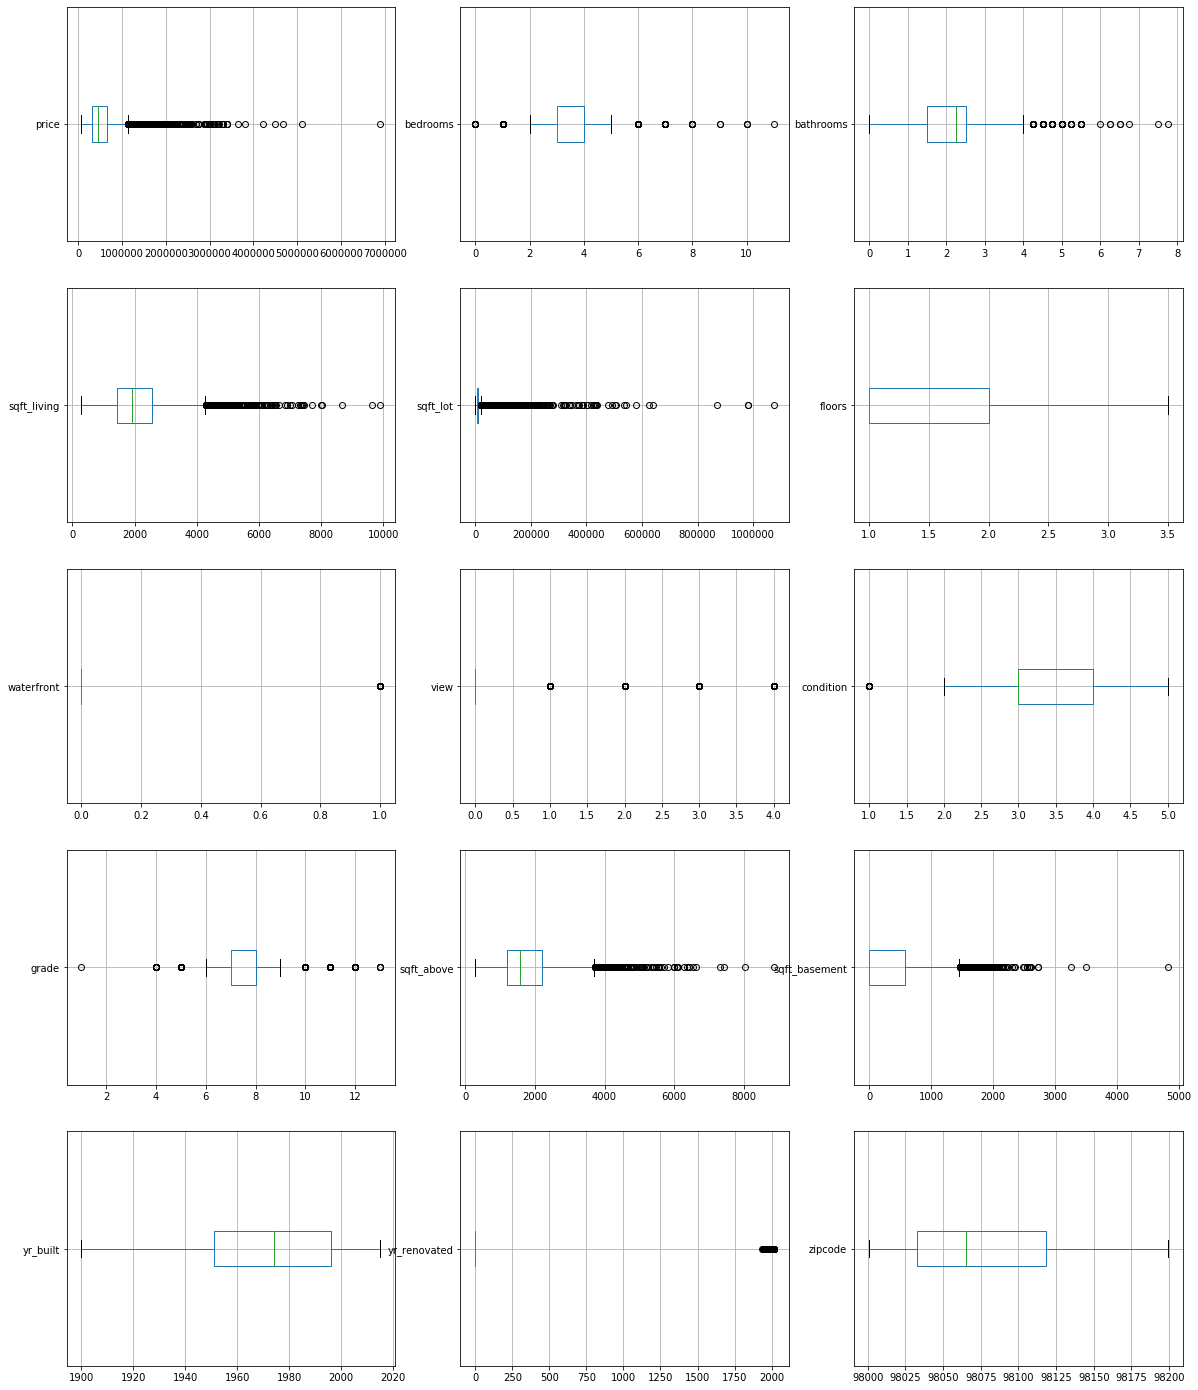

In [47]:
plt.clf()
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,25))
cols = list(newdf.columns.values) 
index=0
col_index = 0
for i in range(0,5):
    for j in range(0,3):
        newdf.boxplot(column=cols[index], ax=axes[i,j], vert=False)
        index = index + 1
plt.show()

### In order to better understand the data, I have also plotted it without including the outliers

<Figure size 432x288 with 0 Axes>

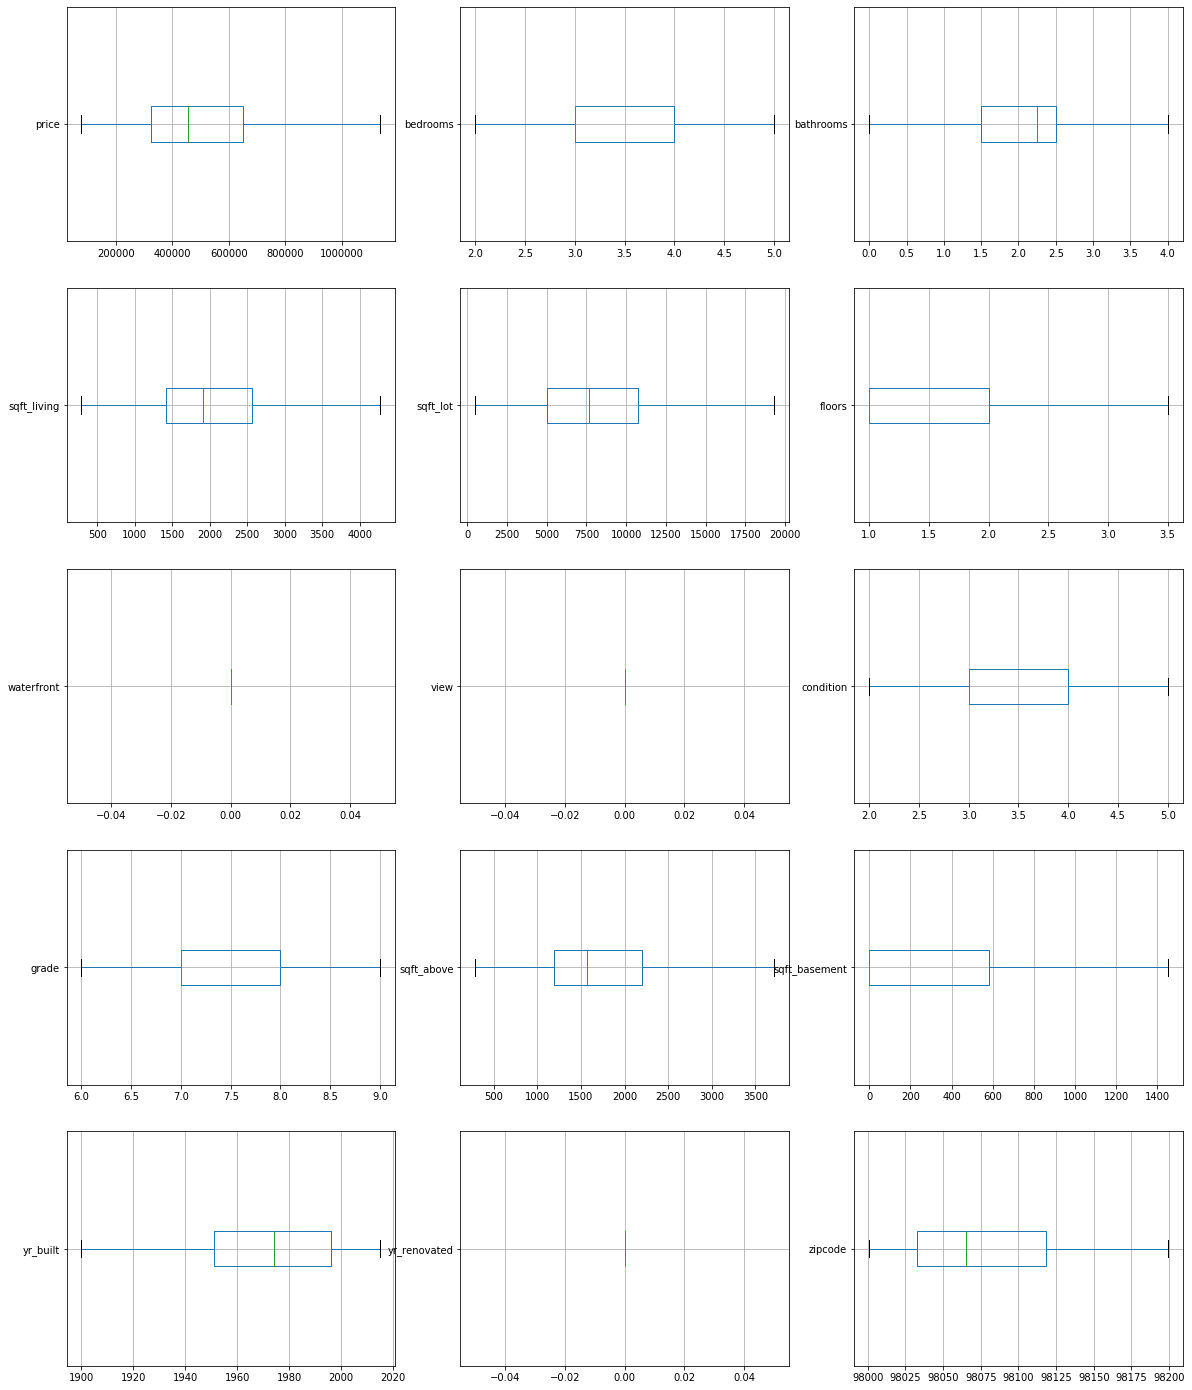

In [48]:
plt.clf()
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,25))
cols = list(newdf.columns.values) 
index=0
col_index = 0
for i in range(0,5):
    for j in range(0,3):
        newdf.boxplot(column=cols[index], ax=axes[i,j], showfliers=False, vert=False)
        index = index + 1
plt.show()

### Observation
- Most of the houses sold falls under the 75th percentile. The median house sold is observed to be $450,000.
- The bathrooms in most of the houses fall under the second quartile. The median seems to be 2.4 bathrooms.
- Most of the houses with a living room and the lot falls under the 75th percentile.
- Most of the houses have a median of 1.5 floors.
- The median house built seems to be around the year 1975.

## Correlation HeatMap

In [49]:
corr = newdf.corr()

In [50]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
price,1.000000,0.315677,0.529949,0.701938,0.093517,0.258072,0.275465,0.420304,0.025433,0.669027,0.599777,0.339035,0.065088,0.125093,-0.070271,0.007824,-0.020882
bedrooms,0.315677,1.000000,0.529305,0.593684,0.027017,0.186876,-0.004190,0.102135,0.018654,0.357480,0.495820,0.307555,0.161253,0.020941,-0.158883,-0.003824,-0.009578
bathrooms,0.529949,0.529305,1.000000,0.749942,0.094090,0.503556,0.067727,0.197688,-0.134647,0.664838,0.683223,0.285176,0.511143,0.046766,-0.207193,-0.018752,-0.012185
sqft_living,0.701938,0.593684,0.749942,1.000000,0.174191,0.346112,0.103118,0.301104,-0.067198,0.760732,0.871134,0.452719,0.322333,0.053591,-0.208920,-0.018142,-0.007326
sqft_lot,0.093517,0.027017,0.094090,0.174191,1.000000,-0.008492,0.029134,0.065841,0.001968,0.117425,0.183839,0.020580,0.056569,0.004662,-0.134618,0.001324,0.001410
floors,0.258072,0.186876,0.503556,0.346112,-0.008492,1.000000,0.017761,0.019245,-0.267194,0.457883,0.523480,-0.246368,0.488254,0.010631,-0.062532,-0.023636,0.004322
waterfront,0.275465,-0.004190,0.067727,0.103118,0.029134,0.017761,1.000000,0.405558,0.015176,0.080841,0.066725,0.088638,-0.032345,0.090006,0.040069,-0.000055,0.012883
view,0.420304,0.102135,0.197688,0.301104,0.065841,0.019245,0.405558,1.000000,0.047292,0.265484,0.168040,0.307478,-0.050186,0.101860,0.077707,0.008711,-0.007368
condition,0.025433,0.018654,-0.134647,-0.067198,0.001968,-0.267194,0.015176,0.047292,1.000000,-0.155766,-0.168741,0.169687,-0.364451,-0.065718,0.006983,-0.048827,0.027088
grade,0.669027,0.357480,0.664838,0.760732,0.117425,0.457883,0.080841,0.265484,-0.155766,1.000000,0.747481,0.190450,0.458317,0.015259,-0.193747,-0.019969,-0.011253


### Using seaborn library to see the colored heatmap for better visualization

<Figure size 432x288 with 0 Axes>

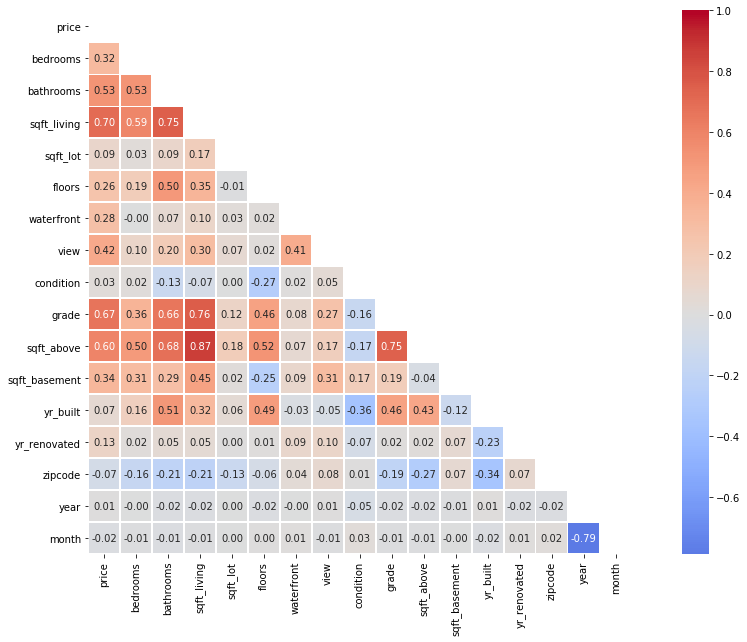

In [51]:
plt.clf() # Clear previous plt figure
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, center=0, fmt=".2f", square=True, linewidths=.5)
plt.show()

- From the above correlation matrix, it can be seen that the price of the house has the highest correlation with the size of the living room, and house grade level. The other two columns which have a high correlation with house cost are sqft above, and bathroom.
- The other observation from the correlation matrix shows that the sqft above and sqft living has the highest correlation.
- There is a correlation among Sqft above and grade. sqft living and grade also has a visible correlation.

## Applying Regression Plot using Seaborn

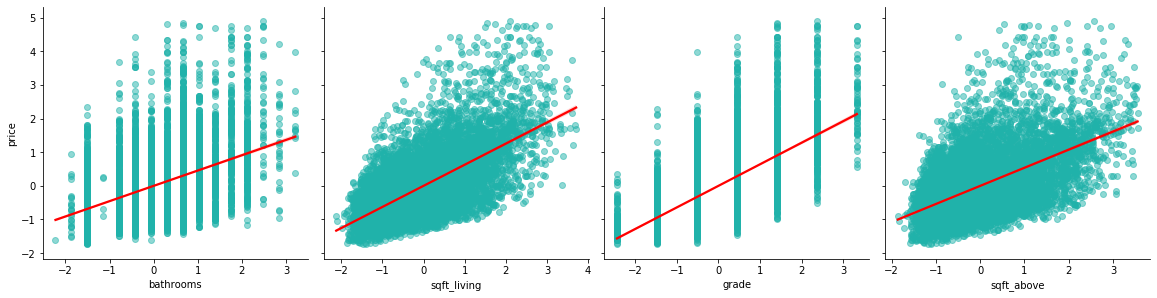

In [52]:
# list(set(F.columns))
explore_features = ['bathrooms','sqft_living','grade','sqft_above']
g = sns.PairGrid(df, y_vars=["price"], x_vars=explore_features, height=4)
g.map(sns.regplot, color=".3", scatter_kws={"color": "lightseagreen", 'alpha': 0.5}, line_kws={'color': 'red'})
# g.map(sns.scatterplot, edgecolor="white")

The above visualizations clearly shows that the house price has a linear relationsip with bathrooms, sqft_living, and sqft_above.

## References:

harlfoxem (2016). *House Sales in King County, USA* (Version 1) [Data file]. Retrieved from https://www.kaggle.com/harlfoxem/housesalesprediction

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}$

# Method

In this section, the Least Squares and Least Mean Squares will be summarized and implemented. Below is the review of both the linear models:

## Least Squares

The main goal of the least-squares model is to minimize the sum of the squared residuals generated by the difference between the actual and predicted values. In this method, we will use all the available data from the training set to determine the best fitting line for that data which will describe the relationship between the dependent and independent variables. Below is the equation for the Least Squares where the *X* represents the matrix of input samples and *t* represents the matrix of the target values in the dataset. Based on the equation which is generated, we will apply the trained model on the testing dataset to predict the results:

$$ \begin{align} \wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \tv \end{align} $$

## Least Mean Squares
The main goal in the least mean squares model is also to minimize the mean squared error as small as possible. The downfall in the least-squares model is that it can be computationally costly if the size of the dataset is very large. But in this model, instead of feeding the entire dataset at once, the algorithm loads the part of the data at the time and runs the training step on the data until the entire dataset is processed. It is also known as sequential or online learning because the algorithm adopts the changing data according to the learning rate set for the model. The model constantly updates the weight as it reads the new data until it finally converges. Below is the equation for calculating the update rule for the Least Mean Squares:

$$\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k$$

## Model Implementation and Description

### Super Class Definition

The BaseModel class contains super class definitions for the general linear model. The abstract methods like train and use enables to have unified interfaces for child classes to be overridden.

In [53]:

import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass

### Abstract Class Definition
The Linear Model is an Abstract class for linear model which contains some utility functions like check matrix and add_ones which can be utilized by the linear model implementation like Mean Squares and Least Mean Squares classes. 
- The _check_matrix function checks whether the matrix shape is 2 dimensional or not. If not, then it throws a wrong matrix exception.
- The add_ones function calls the _check_matrix function to first check whether the matrix is 2D and if it is in correct shape, then it adds a 1's column to the matrix.
- The train abstract function is created for training the algotithm.
- The use abstract function is created for testing the algorithm.

Inheriting the super class, we can define two difference classes for Least Squares and Least Mean Square algorithms. 

### Least Squares

The LinearRegress class implements the Least Square model. The train() updates the weights using Least Squares formula which is described above. The train function will set the weight calculated by the formula in variable w which represents the trained weight. The calculated weight will then be used the use() function which returns the predictions for the argument X.

In [54]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.dot(np.linalg.inv(np.dot(X1.T, X1)), np.dot(X1.T, T))
    
    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        return np.dot(X1,self.w)

### Least Mean Squares

For online learning, LMS algorithm is implemented. In this class, the train function is implemented which calls the train_step function that updates the weight for a single input vector x and one target label. In the train_step function, the weight vector is updated incrementally for the batch data. The use function is implemented to test the dataset based on the weight computed from the training step.

In [55]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    # batch training by using train_step function
    def train(self, X, T):
        for k in range(X.shape[0]):
            self.train_step(X[k], T[k])

    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        X1 = np.hstack((np.ones(1),x))
        if self.w is None:
            self.w = np.zeros(X1.shape[0])
        self.w = self.w - self.alpha * (np.dot(X1, self.w) - t) * X1

    # apply the current model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        return (np.dot(X1,self.w.T)).reshape((-1,1))

### Usage Examples

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

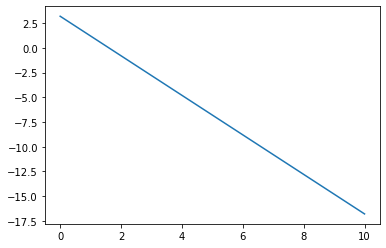

In [57]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

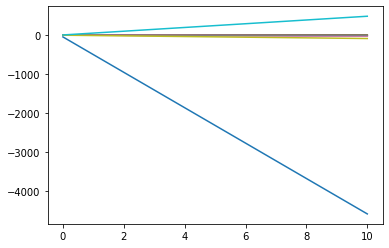

In [58]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

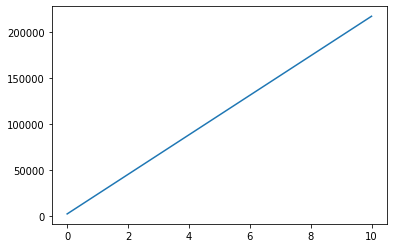

In [59]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

In this section, the Least Squares and Least Mean Squares (LMS) model implemented in the previous section will be applied to the House prediction dataset. First the dataset is splitted into testing and training set. I have used 70% of data for testing and 30% for testing. After applying the machine learning model, the model prediction will be visualized and analyzed to compare the accuracy of both the algorithms.

## Splitting the data into Training and Test dataset

### Data splitted into 70% Training and 30% Testing

In [60]:
train_x = Features.sample(frac=0.70, random_state=0)
train_y = Target.sample(frac=0.70, random_state=0)

test_x = Features.drop(train_x.index)
test_y = Target.drop(train_y.index)

In [61]:
### Verifying the split
# df.query('sqft_living == 3780 & sqft_lot == 23623 & sqft_above == 3780')
# df.query('sqft_living == 3810 & sqft_lot == 9916 & sqft_above == 3810')

### Keeping only the columns which were identified to have high correlation

In [62]:
drop_cols = ['sqft_lot', 'bedrooms', 'floors', 'waterfront', 'view', 'condition',
             'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'year', 'month', 'sqft_above']

# Columns Kept: 'sqft_living','grade','bathrooms'
train_x.drop(drop_cols, inplace=True, axis=1)
test_x.drop(drop_cols, inplace=True, axis=1)

### Converting data into numpy arrays

In [63]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()

In [64]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

## Applying Least Squares Model

In [65]:
ls = LinearRegress()
ls.train(train_x, train_y)
ls_pred = ls.use(test_x)

Text(0.5, 1.0, 'Predictions vs Target')

<Figure size 432x288 with 0 Axes>

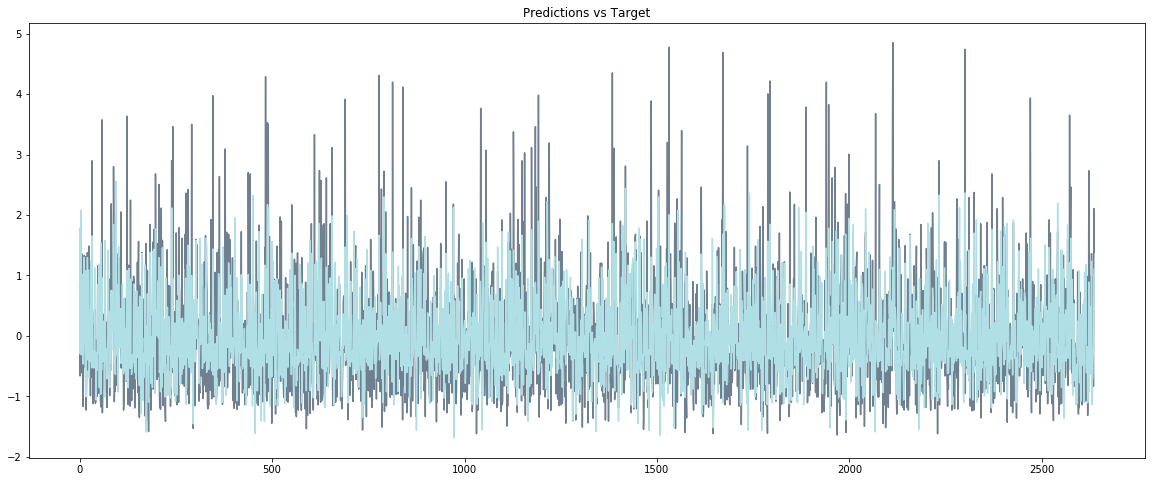

In [66]:
plt.clf()
plt.figure(figsize=(20,8))
plt.plot(test_y, color="slategray")
plt.plot(ls_pred, color="powderblue")
plt.title('Predictions vs Target')

The above visualization plots the target values and predicted values for the house prices in Kings County. Looking at the visualization, it can be seen that most of the data is overlapping the target values but the prediction is not close for the house prices which were significantly higher than other data points. To better understand the data, I have sampled 500 data points from the predicted column below.

Text(0.5, 1.0, 'Predictions vs Target')

<Figure size 432x288 with 0 Axes>

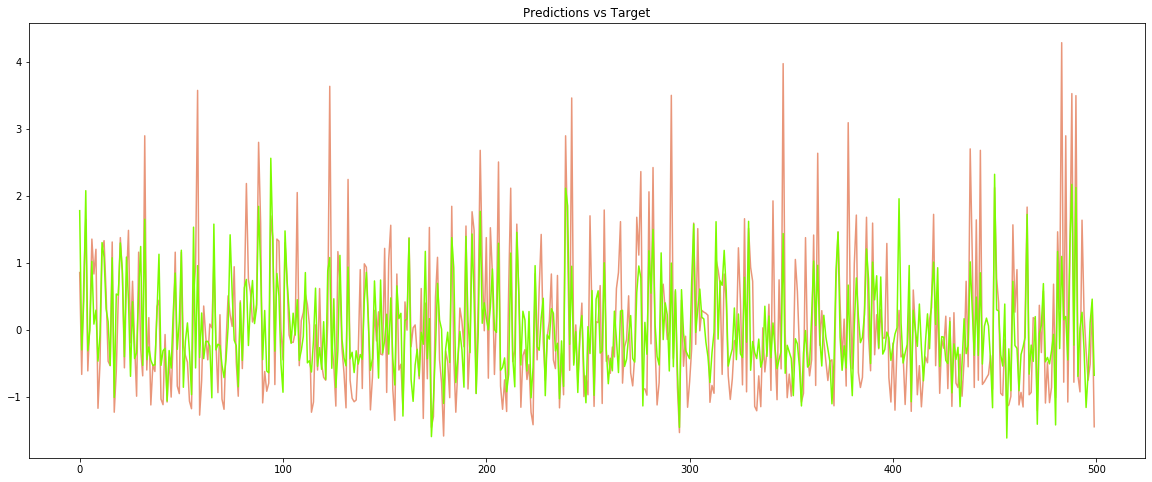

In [67]:
plt.clf()
plt.figure(figsize=(20,8))
plt.plot(test_y[:500], color="darksalmon")
plt.plot(ls_pred[:500], color="lawngreen")
plt.title('Predictions vs Target')

The graph above shows a better representation of the curve for the first 500 data points which were predicted. It can be observed that the data prediction is doing a good job in predicting the average house prices but it is however not able to predict houses which have a very high price ranges.

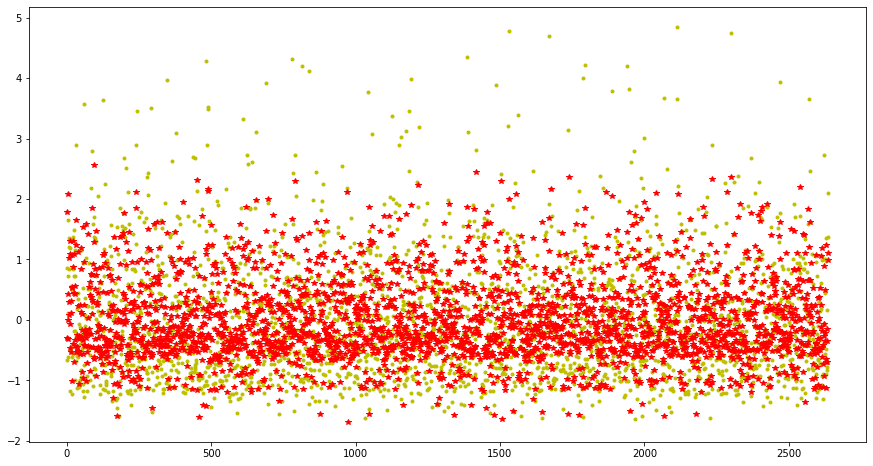

In [68]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(test_y, 'y.')
plt.plot(ls_pred, 'r*')

Above is another representation of the data which displays the predicted and target values from the Least Squares model. The root mean square error for the model is computed below:

In [69]:
print("Root Mean Square Error for Least Squares Model: ", rmse(test_y, ls_pred))

Root Mean Square Error for Least Squares Model:  37.39016531289284


## Applying Least Mean Squares Model

In [70]:
lms = LMS(0.1)
lms.train(train_x, train_y)
lms_pred = lms.use(test_x)

Text(0.5, 1.0, 'Predictions vs Target')

<Figure size 432x288 with 0 Axes>

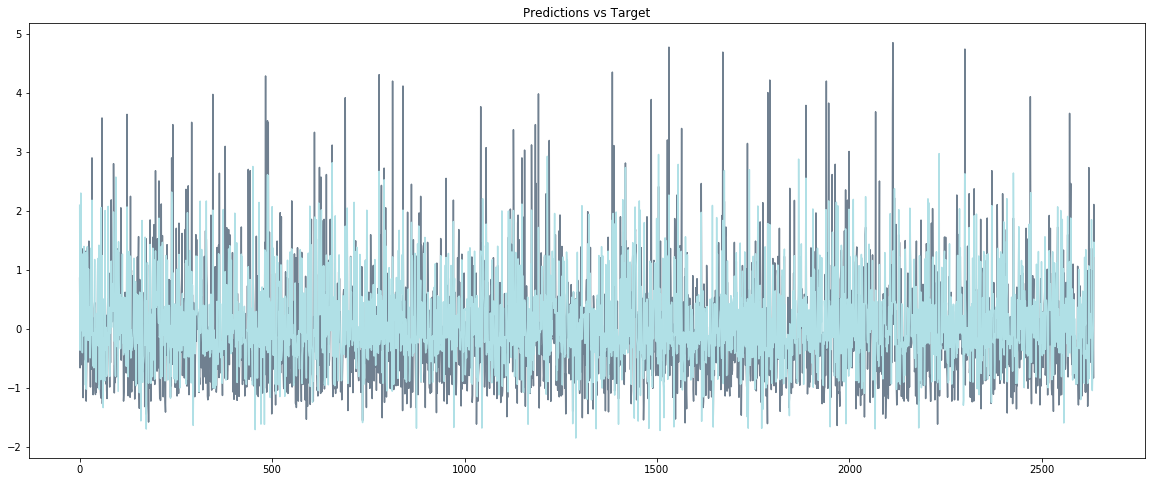

In [71]:
plt.clf()
plt.figure(figsize=(20,8))
plt.plot(test_y, color="slategray")
plt.plot(lms_pred, color="powderblue")
plt.title('Predictions vs Target')

The results for the Least Mean Squares model looks similar to the Least Squares model output. In order to explore the prediction and target curve, I'm sampling the output to see first 500 data points for visualization.

Text(0.5, 1.0, 'Predictions vs Target')

<Figure size 432x288 with 0 Axes>

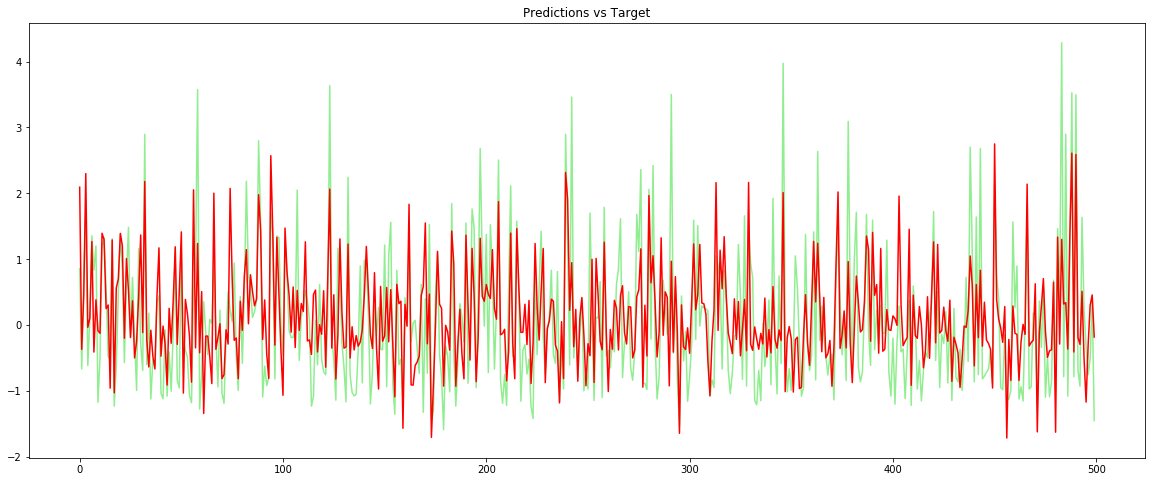

In [72]:
plt.clf()
plt.figure(figsize=(20,8))
plt.plot(test_y[:500], color="lightgreen")
plt.plot(lms_pred[:500], color="red")
plt.title('Predictions vs Target')

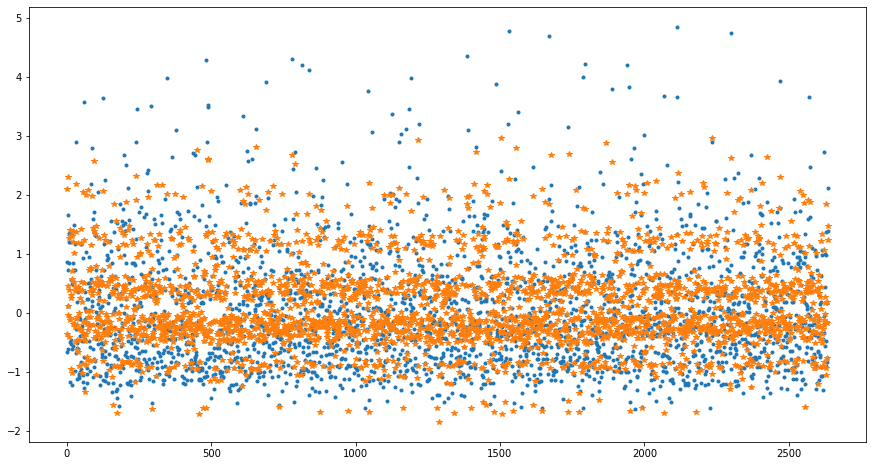

In [73]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(test_y, '.')
plt.plot(lms_pred, '*')

From the above visualization, it can be seen that the LMS algorithm is predicting closer for the house prices which are around normal price range but for the expensive houses, it is not able to predict close to the expected price range. Below is the computed rmse for the model:

In [74]:
print("Root Mean Square Error for Least Mean Squares Model: ", rmse(test_y, lms_pred))

Root Mean Square Error for Least Mean Squares Model:  3292.575614189917


### Alpha Comparision for LMS

<Figure size 432x288 with 0 Axes>

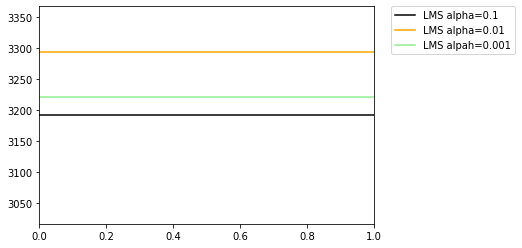

In [75]:
lms2 = LMS(0.01)
lms3 = LMS(0.001)

lms2.train(train_x, train_y)
lms3.train(train_x, train_y)

lms_pred2 = lms2.use(test_x)
lms_pred3 = lms3.use(test_x)

plt.clf()
plt.figure(figsize=(6,4))
plt.axhline(y=rmse(test_y, lms_pred2), color='black', label="LMS alpha=0.1")
plt.axhline(y=rmse(test_y, lms_pred), color='orange', label="LMS alpha=0.01")
plt.axhline(y=rmse(test_y, lms_pred3), color='lightgreen', label="LMS alpah=0.001")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

From the above alpha comparisions, it can be seen that the root mean square error increases each time the alpha is increased. 
Since I am sampling the data randomly, there could be difference in the performance of alpha based on the sampled data. Therefore, it is necessary to test several different values for alpha and verify which value performs better.

## Analysis

In the above experiment of training the dataset on the Least Squares model and Least Mean Square model, the Root Mean Square Error for the Least Squares model was lower than the Least Mean Squares model. The Least Square algorithm worked significantly better than the Least Mean Square algorithm. 

During the experiments, I found out that both the algorithms are sensitive to the outliers and unnormalized data. When I first tested the data without removing outliers, the Root Mean Square Error for both the algorithms were significantly large. After removing the outliers and normalizing the dataset, the Root Mean Square Error dropped drastically for the Least Squares model. The Least Mean Square algorithm also performed better after the normalization step was added. 

After several experiments with the alpha, I found out that when the alpha was increased, the Root Mean Square Error of the LMS algorithm also increased respectively. In order to get the best accuracy for the LMS algorithm, it is necessary to ensure that several alpha values are tested and best performing alpha is selected for the model.

# Conclusions

In this assignment, I have learned to implement the Least Squares model and Least Mean Squares model using Object-Oriented Programming. The implementation of both algorithms helped me to understand how offline learning and online learning is used to train a model on a real dataset. 

The implementation of the Least Squares model was very straightforward because in that algorithm, all the data is trained in one run and weight parameters are determined. The implementation of the Least Mean Squares algorithm was the challenging part of this assignment because, in that algorithm, the weight for the model is updated constantly based on the training step. Determining the required shape for the matrices took more time for me to figure out. 

Overall this assignment was very helpful for me to understand how the Linear regression model is implemented and how it is applied to the dataset to make predictions.

# References

Geron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build <br>Intelligent Systems* (2nd ed.). Sebastopol, CA: O'Reilly Media, Incorporated.

harlfoxem (2016). *House Sales in King County, USA* (Version 1) [Data file]. Retrieved from https://www.kaggle.com/harlfoxem/housesalesprediction

Sharma, Natasha (2018). *Ways to Detect and Remove the Outliers.* Retrieved from https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [76]:
# Self-Test code for accuracy of the model
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
